# Benchmark with AutoXRD paper data

This notebook compares the results between _Xerus_ method against the CNN-method implemented in the following paper:
```
Szymanski, N. J., Bartel, C. J., Zeng, Y., Tu, Q., & Ceder, G. (2021). Probabilistic Deep Learning Approach to Automate the Interpretation of Multi-phase Diffraction Spectra. Chemistry of Materials.
```
For the results of _Xerus_ in the presented alloys in the paper, please refer to the Examples.ipnyb.

# Preloads

In [1]:
# Since Xerus is nto distrubutdd as package (GSAS II etc), it is needed to append it into system path first
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import os
from Xerus import XRay
from Xerus.utils.tools import create_folder
create_folder("benchmark")
DATA_BENCHMARK = "data/bench/"
files = [file for file in os.listdir(DATA_BENCHMARK)]
two_phase = [file for file in files if len(file.replace("_parsed.csv", "").split("+")) == 2]
three_phase = [file for file in files if len(file.replace("_parsed.csv", "").split("+")) == 3]

GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py


In [2]:
from typing import Tuple
from pymatgen import Composition
# Helper functions.

def file_to_materials(filename: str) -> Tuple[str]:
    """Parses a filename and returns the materials containing in it."""
        # Lets first remove the _parsed.csv
    fileclean = filename.replace("_parsed.csv", "")
    
    # Get the component materials of the mixture.
    materials = fileclean.split("+")
    
    # Return it
    return materials
    
def file_to_folder(filename: str, basefolder: str = "benchmark") -> str:
    """Parses a filename and returns a folder name based on the filename and a basepath."""
    
    # Get the materials
    materials = file_to_materials(filename)
    
    # Return the foldername as a join "_"
    return os.path.join(basefolder, "_".join(materials))

def file_to_elements(filename: str) -> Tuple[str]:
    """Get a tuple of unique elements of a material mixture"""
    
    # Get the materials
    materials = file_to_materials(filename)
    
    # For each material, lets define their set of elements.
    print(materials)
    
    # Empty set
    unique_elements = set()
    for material in materials:
        material_elements = set(Composition(material).as_dict().keys())
        unique_elements = unique_elements.union(material_elements)
        
    return tuple(unique_elements)
        
results_auto = {}

# Automatic mode (n_runs = auto)

In [ ]:
for phase in two_phase:
    # Setup information
    datapath = os.path.join(DATA_BENCHMARK, phase)
    elements = file_to_elements(phase)
    working_folder = file_to_folder(phase)
    
    # Create Xray object
    run = XRay(name=phase,
               exp_data_file=datapath,
               elements=elements,
               remove_background=True,
               working_folder=working_folder,
               max_oxy=4)
    
    
    # Analyze and store.
    run.analyze(n_runs="auto")
    
    # Save objecti nto memory?
    results_auto[phase] = run
    
for phase in three_phase:
    # Setup information
    datapath = os.path.join(DATA_BENCHMARK, phase)
    elements = file_to_elements(phase)
    working_folder = file_to_folder(phase)
    
    # Create Xray object
    run = XRay(name=phase,
               exp_data_file=datapath,
               elements=elements,
               remove_background=True,
               working_folder=working_folder,
               max_oxy=4)
    
    
    # Analyze and store.
    run.analyze(n_runs="auto")
    
    # Save objecti nto memory?
    results_auto[phase] = run

# Save results into CSV
path_auto = "benchmark/results/auto/"
for k,v in results_auto.items():
    filename = k.replace("_parsed.csv", "_results_auto.csv")
    v.results.to_csv(os.path.join(path_auto, filename))

['MnF2', 'TiO2']
No datafmt passed. Assuming its csv
Sucessfuly read datafile data/bench/MnF2+TiO2_parsed.csv
Standarizing intensity to [0,1]..
Exported new datafile at benchmark/MnF2_TiO2/MnF2+TiO2_parsed_preprocessed.csv
Removing background using polynomial degree: 8
Using preprocessed data benchmark/MnF2_TiO2/MnF2+TiO2_parsed_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:Ti
No matching system type Ti found in the database
Sucessfuly connected to the database
No matching system type Ti found in the database
Writing /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_MP/Ti_MP_mp-46.cif
Writing /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_MP/Ti_MP_mp-72.cif
I am querying the following combination from COD: Ti
http://www.crystallography.net/cod/result?el1=Ti&strictmin=1&strictmax=1&maxv=10000&format=urls


100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 110.73it/s]


Querying OQMD through OPTIMADE....
Saving Ti_OQMD_4063158.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_OQMD/Ti_OQMD_4063158.cif...
Saving Ti_OQMD_4789554.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_OQMD/Ti_OQMD_4789554.cif...
Saving Ti_OQMD_4790016.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_OQMD/Ti_OQMD_4790016.cif...
Saving Ti_OQMD_4790019.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_OQMD/Ti_OQMD_4790019.cif...
Saving Ti_OQMD_4790046.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_OQMD/Ti_OQMD_4790046.cif...
Saving Ti_OQMD_4790067.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_OQMD/Ti_OQMD_4790067.cif...
Saving Ti_OQMD_4813035.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_OQMD/Ti_OQMD_4813035.cif...
Saving Ti_OQM

51it [00:02, 20.16it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_cifs/Ti_OQMD_5077902.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_cifs/Ti_COD_9012924.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_cifs/Ti_OQMD_5185296.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_cifs/Ti_OQMD_5076564.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_cifs/Ti_COD_9012925.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_cifs/Ti_OQMD_5078067.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti_cifs/Ti_COD_9008517.cif in GSASII
We are going to try to run /home/pedrobcst/D

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 98.53it/s]


Querying OQMD through OPTIMADE....
Saving F2_OQMD_5608794.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_OQMD/F2_OQMD_5608794.cif...
Saving F2_OQMD_5608796.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_OQMD/F2_OQMD_5608796.cif...
Saving F2_OQMD_5608799.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_OQMD/F2_OQMD_5608799.cif...
Saving F2_OQMD_5608803.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_OQMD/F2_OQMD_5608803.cif...
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs
GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py


9it [00:00, 30.81it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs/F2_COD_1527921.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs/F2_COD_9012106.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs/F2_MP_mp-561203.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs/F2_OQMD_5608796.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs/F2_OQMD_5608803.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs/F2_OQMD_5608794.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_F_cifs/F2_COD_9012465.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 100.41it/s]


Querying OQMD through OPTIMADE....
Saving Mn_OQMD_4652562.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_OQMD/Mn_OQMD_4652562.cif...
Saving Mn_OQMD_5567451.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_OQMD/Mn_OQMD_5567451.cif...
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs


2it [00:00, 13.83it/s]

GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py


14it [00:00, 20.58it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs/Mn_COD_9008591.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs/Mn_OQMD_5567451.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs/Mn_MP_mp-35.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs/Mn_COD_9011197.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs/Mn_COD_9011108.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs/Mn_COD_9011068.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn_cifs/Mn_OQMD_4652562.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbo

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 53.41it/s]


Querying OQMD through OPTIMADE....
Saving TiF3_OQMD_4066479.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_OQMD/TiF3_OQMD_4066479.cif...
Failed to convert 5895922 to pymatgen structure..
Saving TiF4_OQMD_5812894.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_OQMD/TiF4_OQMD_5812894.cif...
Saving TiF4_OQMD_5815776.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_OQMD/TiF4_OQMD_5815776.cif...
Saving TiF4_OQMD_5848630.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_OQMD/TiF4_OQMD_5848630.cif...
Saving TiF4_OQMD_6010836.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_OQMD/TiF4_OQMD_6010836.cif...
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_

10it [00:00, 24.90it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_cifs/TiF3_MP_mp-562468.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_cifs/TiF3_OQMD_4066479.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_cifs/TiF4_OQMD_5848630.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_cifs/TiF3_COD_1540115.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_cifs/TiF4_OQMD_5815776.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_cifs/TiF4_OQMD_6010836.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-F_cifs/TiF3_MP_mp-246.cif in GSASII
We are going to t

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 120.78it/s]


Querying OQMD through OPTIMADE....
Saving TiMn_OQMD_4373346.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_OQMD/TiMn_OQMD_4373346.cif...
Saving TiMn_OQMD_4509585.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_OQMD/TiMn_OQMD_4509585.cif...
Saving TiMn_OQMD_5569055.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_OQMD/TiMn_OQMD_5569055.cif...
Saving TiMn_OQMD_5578117.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_OQMD/TiMn_OQMD_5578117.cif...
Saving Ti2Mn_OQMD_5174292.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_OQMD/Ti2Mn_OQMD_5174292.cif...
Saving TiMn2_OQMD_4107132.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_OQMD/TiMn2_OQMD_4107132.cif...
Saving TiMn2_OQMD_5950112.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed

13it [00:00, 21.94it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_cifs/TiMn2_COD_1523418.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_cifs/TiMn_OQMD_5578117.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_cifs/Ti4.8Mn7.2_COD_1523641.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_cifs/TiMn_OQMD_5569055.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_cifs/TiMn2_MP_mp-1949.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_cifs/TiMn2_OQMD_4107132.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn_cifs/Ti21Mn25_MP_mp-1202079.cif in GSA

100%|██████████████████████████████████████████| 80/80 [00:00<00:00, 173.44it/s]


Querying OQMD through OPTIMADE....
Saving TiO_OQMD_4089960.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_OQMD/TiO_OQMD_4089960.cif...
Saving TiO_OQMD_5575964.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_OQMD/TiO_OQMD_5575964.cif...
Saving Ti2O_OQMD_4810221.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_OQMD/Ti2O_OQMD_4810221.cif...
Saving Ti3O_OQMD_4817679.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_OQMD/Ti3O_OQMD_4817679.cif...
Saving Ti3O_OQMD_4855149.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_OQMD/Ti3O_OQMD_4855149.cif...
Saving Ti6O_OQMD_4078437.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_OQMD/Ti6O_OQMD_4078437.cif...
Saving Ti6O_OQMD_4815660.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_OQMD/

58it [00:01, 28.51it/s]

We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti6O_COD_1529015.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti9O17_COD_1008198.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO_MP_mp-1071163.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_MP_mp-1840.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_COD_8104269.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti3O5_OQMD_4781850.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti2O3_OQMD_4841166.cif in GSASII
We are going t

114it [00:03, 30.31it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_COD_9004142.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_OQMD_4071720.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti2O3_OQMD_5629781.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_MP_mp-554278.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_COD_1544349.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_OQMD_5812901.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti2O3_OQMD_5816093.cif in GSASII
We are going

144it [00:04, 29.07it/s]



We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_OQMD_4094856.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_MP_mp-430.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO_COD_1536851.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_COD_9004141.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/TiO2_COD_9004139.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti8O15_COD_1008197.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O_cifs/Ti11.1O18_COD_2106210.cif in GSASII
We are going t

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 272.06it/s]


Querying OQMD through OPTIMADE....
Saving MnF2_OQMD_4071792.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_OQMD/MnF2_OQMD_4071792.cif...
Saving MnF2_OQMD_4094994.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_OQMD/MnF2_OQMD_4094994.cif...
Saving MnF2_OQMD_5577091.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_OQMD/MnF2_OQMD_5577091.cif...
Saving MnF2_OQMD_5731262.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_OQMD/MnF2_OQMD_5731262.cif...
Saving MnF2_OQMD_5813334.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_OQMD/MnF2_OQMD_5813334.cif...
Saving MnF2_OQMD_5817154.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_OQMD/MnF2_OQMD_5817154.cif...
Saving MnF2_OQMD_5817290.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_O

28it [00:00, 30.78it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_cifs/MnF3_OQMD_5812301.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_cifs/MnF3_OQMD_4866153.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_cifs/MnF2_COD_9009076.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_cifs/MnF3_MP_mp-556560.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_cifs/MnF2_OQMD_4071792.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_cifs/MnF4_OQMD_5030346.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-F_cifs/MnF2_OQMD_6014322.cif in GSASII
We are going t

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 173.35it/s]


Querying OQMD through OPTIMADE....
Saving OF_OQMD_5856541.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_OQMD/OF_OQMD_5856541.cif...
Saving O2F_OQMD_5856323.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_OQMD/O2F_OQMD_5856323.cif...
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_cifs
GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py


5it [00:00, 21.47it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_cifs/OF_OQMD_5856541.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_cifs/O0.875F0.125_COD_1531805.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_cifs/O2F_OQMD_5856323.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_cifs/OF2_MP_mp-1095223.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_O-F_cifs/OF_COD_7036380.cif in GSASII
Uploading database with cifs..
5
Deleting..
Checking the following combination:Mn-O
No matching system type Mn-O found in the database
Sucessfuly connected to the database
No matching system type Mn-O found in the database
Writing /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.

 61%|██████████████████████████▏                | 53/87 [00:00<00:00, 75.39it/s]

Pymatgen failed to parse the following CIF: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_COD/6000233.cif
The metadata for such CIF will be unobtainable. This CIF will be removed.


100%|███████████████████████████████████████████| 87/87 [00:01<00:00, 70.48it/s]


Querying OQMD through OPTIMADE....
Saving MnO_OQMD_4062090.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_OQMD/MnO_OQMD_4062090.cif...
Saving MnO_OQMD_4500522.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_OQMD/MnO_OQMD_4500522.cif...
Saving MnO_OQMD_5492689.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_OQMD/MnO_OQMD_5492689.cif...
Saving MnO_OQMD_5571623.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_OQMD/MnO_OQMD_5571623.cif...
Saving MnO_OQMD_5629578.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_OQMD/MnO_OQMD_5629578.cif...
Saving MnO_OQMD_5731739.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_OQMD/MnO_OQMD_5731739.cif...
Saving MnO_OQMD_5731879.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_OQMD/MnO_OQMD_

61it [00:02, 21.12it/s]

We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn2O3_COD_1514119.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO_COD_1514105.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO_COD_9006669.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn2O3_COD_1514235.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn3O4_COD_1514241.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_COD_9016028.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_OQMD_5911893.cif in GSASII
We are going to tr

119it [00:05, 27.97it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO_COD_1514231.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_COD_2105790.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_COD_1514101.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_OQMD_5849161.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn2O3_COD_1514106.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_COD_1514117.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn7O8_OQMD_5739579.cif in GSASII
We are going to 

143it [00:06, 22.93it/s]



We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn3O4_OQMD_4815720.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO_MP_mp-19006.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_COD_9016667.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_OQMD_5813220.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/MnO2_OQMD_5813675.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn3.64O4_COD_1514226.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O_cifs/Mn3O4_OQMD_4502748.cif in GSASII
We are goi

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 50.61it/s]


Pymatgen failed to parse the following CIF: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-F_COD/6000588.cif
The metadata for such CIF will be unobtainable. This CIF will be removed.
Querying OQMD through OPTIMADE....
Saving TiMnF6_OQMD_5783591.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-F_OQMD/TiMnF6_OQMD_5783591.cif...
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-F_cifs


1it [00:00,  7.63it/s]


GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-F_cifs/TiMnF6_OQMD_5783591.cif in GSASII
Uploading database with cifs..
1
Deleting..
Checking the following combination:Ti-O-F
No matching system type Ti-O-F found in the database
Sucessfuly connected to the database
No matching system type Ti-O-F found in the database
I am querying the following combination from COD: Ti-O-F
http://www.crystallography.net/cod/result?el1=Ti&el2=O&el3=F&strictmin=1&strictmax=3&maxv=10000&format=urls


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 95.83it/s]


Querying OQMD through OPTIMADE....
Saving TiOF_OQMD_5346037.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_OQMD/TiOF_OQMD_5346037.cif...
Saving Ti2O3F2_OQMD_5793898.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_OQMD/Ti2O3F2_OQMD_5793898.cif...
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_cifs
GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py


5it [00:00, 21.85it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_cifs/Ti2O3F2_OQMD_5793898.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_cifs/Ti6O5.999994F12.000006_COD_2300283.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_cifs/Ti1O0.99F2.01_COD_2310844.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_cifs/Ti7O3.6822F30_COD_1538336.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-O-F_cifs/TiOF_OQMD_5346037.cif in GSASII
Uploading database with cifs..
5
Deleting..
Checking the following combination:Ti-Mn-O
No matching system type Ti-Mn-O found in the database
Sucessfuly connected to the database
No matching system type Ti-Mn-O found in the database
Writing /home/ped

100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 29.23it/s]


Pymatgen failed to parse the following CIF: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_COD/5910167.cif
The metadata for such CIF will be unobtainable. This CIF will be removed.
Querying OQMD through OPTIMADE....
Saving TiMnO3_OQMD_4089612.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_OQMD/TiMnO3_OQMD_4089612.cif...
Saving TiMnO3_OQMD_4864098.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_OQMD/TiMnO3_OQMD_4864098.cif...
Saving TiMnO3_OQMD_4897230.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_OQMD/TiMnO3_OQMD_4897230.cif...
Saving TiMnO4_OQMD_6054031.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_OQMD/TiMnO4_OQMD_6054031.cif...
Saving Ti2MnO4_OQMD_4501005.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_OQMD/Ti2MnO4_OQMD_4501005.cif...
Savi

22it [00:01, 19.88it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_cifs/TiMnO3_MP_mp-19082.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_cifs/TiMn2O4_COD_9005232.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_cifs/TiMnO3_COD_9005866.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_cifs/TiMn2O4_OQMD_4870836.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_cifs/Ti3Mn3O_COD_1541453.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_cifs/Ti2MnO5_OQMD_5857436.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O_cifs/Ti2MnO4_OQMD

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 69.10it/s]


Querying OQMD through OPTIMADE....
Saving MnOF_OQMD_5352223.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_OQMD/MnOF_OQMD_5352223.cif...
Saving Mn3(OF)2_OQMD_5793700.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_OQMD/Mn3(OF)2_OQMD_5793700.cif...
Saving Mn4OF6_OQMD_5732729.cif... to /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_OQMD/Mn4OF6_OQMD_5732729.cif...
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_cifs
GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py


5it [00:00, 23.03it/s]


We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_cifs/Mn2O2F9_MP_mp-27807.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_cifs/Mn3(OF)2_OQMD_5793700.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_cifs/Mn4OF6_OQMD_5732729.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_cifs/Mn2O2F9_COD_1538338.cif in GSASII
We are going to try to run /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Mn-O-F_cifs/MnOF_OQMD_5352223.cif in GSASII
Uploading database with cifs..
5
Deleting..
Checking the following combination:Ti-Mn-O-F
No matching system type Ti-Mn-O-F found in the database
Sucessfuly connected to the database
No matching system type Ti-Mn-O-F found in the database
I am querying the following combinati

0it [00:00, ?it/s]


Querying OQMD through OPTIMADE....
Finished downloading CIFs.
Testing, uploading and deleting cifs...
python /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/tcif.py /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/queriers/MnF2+TiO2_parsed.csv_Ti-Mn-O-F_cifs
GSAS-II binary directory: /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/Xerus/Xerus/Xerus/GSASII/config.py


0it [00:00, ?it/s]


Uploading database with cifs..
0
It seems that there is no CIF for the following combination: Ti-Mn-O-F
adding dummy entry, ran=False guarantees that there will be no trouble.
Deleting..
Ti
F
Mn
Ti-F
Ti-Mn
Ti-O
Mn-F
O-F
Mn-O
Ti-Mn-F
Ti-O-F
Ti-Mn-O
Mn-O-F
Ti-Mn-O-F
Modified Query for given 4 to : ['Ti', 'F', 'Mn', 'Ti-F', 'Ti-Mn', 'Ti-O', 'Mn-F', 'O-F', 'Mn-O', 'Ti-Mn-F', 'Ti-O-F', 'Ti-Mn-O', 'Mn-O-F', 'Ti-Mn-O-F']
Simulating 449 patterns
Done. Cleaning up GSASII files.
Highest Correlated pattern is MnF2, with Cij: 0.7108427380175203
MnF2+TiO2_parsed.csv_Top30.html
Sucessfuly read datafile benchmark/MnF2_TiO2/MnF2+TiO2_parsed_preprocessed.csv
Refining 3 highest correlated patterns and determining main phase (n=0)...
Phase detected MnF2_COD_9007535.cif with rwp 12.626988843166808
Removing 0 patterns that maximum intensity dropped below 10%.
Phase detected Ti3O5_OQMD_4784043.cif
Removing 15 patterns that maximum intensity dropped below 10%.
Intensity lower than 10%. Finishing run
Number t

# Parse Results and Check Answers

In [7]:
# Fix different compositions to the correct answer
composition_map = {'Li6.48Mn14.24O32': 'LiMn2O4',
 'Li8.832Mn15.168O32': 'LiMn2O4',
 'MnF2': 'MnF2',
 'MnO': 'MnO',
 'Li2MnO3': 'Li2MnO3',
 'TiO2': 'TiO2',
 'Mn2O3': 'Mn2O3',
 'LiMnO2': 'LiMnO2',
 'Li2TiO3': 'Li2TiO3',
 'LiF': 'LiF',
 'Li36Mn72O144': 'LiMn2O4',
 "Li0.104Ti4O8": "TiO2",
 "Mn": "Mn"}
 
# Set the ground thruth for the detected phase 
ground_truth = {'Li2MnO3': 'C2/m',
 'MnO': 'Fm-3m',
 'TiO2': 'I4_1/amd',
 'MnF2': 'P4_2/mnm',
 'LiMnO2': 'Pmmn',
 'LiMn2O4': 'Fd-3m',
 'Mn2O3': 'Ia-3',
 'LiF': 'Fm-3m',
 "Li2TiO3": "C2/c",
 "Mn": "I4-3m"}

In [8]:
from pathlib import Path
import os
import pandas as pd
from pymatgen import Composition
auto_path = Path("benchmark/results/auto/")

# Load data
data_auto = {}
for file in auto_path.glob("*.csv"):
    materials = os.path.basename(file).split("_results_auto.csv")[0]
    data_auto[materials] = pd.read_csv(file)
    


In [9]:
from typing import List, Tuple
def check_result(materials_mixed: Tuple, results_names: List[str], results_spg: List[str]):
    """Compare the obtained results by Xerus with the ones labeled by the groudtruth (based on AtomWork.)

    Parameters
    ----------
    materials_mixed : List[str]
        This is just the materials mixed before tkaing XRD
    results_names : List[str]
        Results suggested by Xerus (usually at loc[0], lowest at Rwp)
    results_spg : List[str]
        The spg of each composition
    """

    correct = []
    wrong = []
    number_of_phases = len(materials_mixed)  # Scale the maping from 0,...n to 1,...n+1.
    phases_detected = len(results_name)
    # Lets first map the composition to the correct scale.
    for composition, spacegroup in zip(results_names, results_spg):
        mapped_composition = composition_map[composition]
        if mapped_composition not in materials_mixed:
            wrong.append((composition, spacegroup))
        elif ground_truth[mapped_composition] == spacegroup:
            correct.append((composition, spacegroup))
        else:
            wrong.append((composition, spacegroup))
    
    results = {
            "mixture": materials_mixed, 
            "correct": correct,
            "wrong": wrong,
            "total_correct": len(correct),
            "total_wrong": number_of_phases - len(correct),
            "number_of_phases": number_of_phases,
            "number_of_phases_detected": phases_detected
        
    }

    return results



In [10]:
auto_bench_results = []
for mix, df in data_auto.items():
    
    try:
        results_name = eval(df.name.iat[0])
        results_spg = eval(df.spacegroup.iat[0])
    except NameError:
        results_name = [df.name.iat[0]]
        results_spg = [df.spacegroup.iat[0]]
    
    mixture = tuple(mix.split("+"))
    auto_bench_results.append(check_result(mixture, results_name, results_spg))

In [11]:
auto_benchmark = pd.DataFrame.from_records(auto_bench_results)

In [12]:
auto_benchmark.sort_values(by="number_of_phases", ascending=False)

,mixture,correct,wrong,total_correct,total_wrong,number_of_phases,number_of_phases_detected
0,"(Li2TiO3, MnF2, LiMn2O4)","[(Li6.48Mn14.24O32, Fd-3m), (MnF2, P4_2/mnm)]",[],2,1,3,2
1,"(Li2MnO3, MnO, TiO2)","[(MnO, Fm-3m), (Li2MnO3, C2/m), (Li0.104Ti4O8,...",[],3,0,3,3
2,"(Mn2O3, TiO2, LiMnO2)","[(Mn2O3, Ia-3), (LiMnO2, Pmmn), (Li0.104Ti4O8,...",[],3,0,3,3
3,"(Mn2O3, Li2TiO3, TiO2)","[(Mn2O3, Ia-3), (Li0.104Ti4O8, I4_1/amd), (Li2...",[],3,0,3,3
7,"(LiMn2O4, LiF, Li2MnO3)","[(Li8.832Mn15.168O32, Fd-3m), (LiF, Fm-3m)]","[(Mn, I-43m), (LiMnO2, Pmmn)]",2,1,3,4
4,"(Mn2O3, LiF)","[(Mn2O3, Ia-3), (LiF, Fm-3m)]",[],2,0,2,2
5,"(TiO2, MnO)","[(MnO, Fm-3m), (TiO2, I4_1/amd)]",[],2,0,2,2
6,"(MnF2, TiO2)","[(MnF2, P4_2/mnm), (TiO2, I4_1/amd)]",[],2,0,2,2
8,"(LiMn2O4, Li2MnO3)",[],"[(Li36Mn72O144, I4_1/amd)]",0,2,2,1
9,"(LiMnO2, Li2MnO3)","[(Li2MnO3, C2/m), (LiMnO2, Pmmn)]",[],2,0,2,2


**Note**: As noted in the paper, we believe that the mixture of LiMn2O4, LiF and Li2MnO3 actually contains LiMnO2 instead of Li2MnO3.

**Note$^{2}$**: Li0.104Ti4O8 is mapped to TiO2, as this structure is the same as TiO2 with small amount of intercalated Li (called lithiated anastase). Ie this is TiO2 with few Li atoms inside their oxygen octahedra. See [this link](https://pubs.acs.org/doi/pdf/10.1021/ja028165q)

In [17]:
total_wrong = auto_benchmark.total_wrong.sum() - 1  # -1 because LiMnO2 should be correct and Mn is just extra phase.
total_detected = auto_benchmark.number_of_phases_detected.sum()
accuracy = (25 - total_wrong)/25 * 100

print(f"Total number of phases detected: {total_detected}")
print(f"Number of Mistakes (Missclassification and Not Found): {total_wrong}")
print(f"Accuracy: {accuracy}%")

Total number of phases detected: 24
Number of Mistakes (Missclassification and Not Found): 3
Accuracy: 88.0%


# XERUS missclassification of LiMn2O4 (Results for Ver 1.1 [paper])

The misclassification of LiMn2O4 due to the presence of both room temperature and low temperature structure, is an example of the needed human-in-the-loop. 
This happened in two mixtures:
* LiMn2O4 + LiF + LiMnO2
* LiMn2O4 + Li2MnO3

Lets breakdown both and see what human intervation is needed to find the correct solution.


## LiMn2O4 + LiF + LiMnO2

As stated in the paper, for this case just checking the top 2 results should be enough.
We see that the lowest Rwp is indeed the low temperature structure, and the second best is the room temperature one (Note that Rwp difference is also of 0.03%)

In this case, a final human check can be done straightfowardlly by just checking the final dataframe results.

In [25]:
missclass_1 = results_auto['LiMn2O4+LiF+Li2MnO3_parsed.csv'] # Get the benchmark result
missclass_1.results.head(3) # Investigate the top 3 results

,provider,id,name,filename,spacegroup,spacegroup_number,crystal_system,system_type,full_path,rwp,wt,nruns,pos,gpx_path
0,"[COD, COD, COD]","[1010990, 4001894, 7214212]","[LiF, Li36Mn72O144, LiMnO2]","[LiF_COD_1010990.cif, Li36Mn72O144_COD_4001894...","[Fm-3m, I4_1/amd, Pmmn]","[225, 141, 59]","[cubic, tetragonal, orthorhombic]","[Li-F, Li-Mn-O, Li-Mn-O]",[benchmark/LiMn2O4_LiF_Li2MnO3/cifs/LiF_COD_10...,8.343500,"[0.5065, 0.25677, 0.23673]",3,"[1, 2, 3]",benchmark/LiMn2O4_LiF_Li2MnO3/gsas2_files/LiF-...
1,"[COD, COD, COD]","[1010990, 1514031, 7214212]","[LiF, Li8.832Mn15.168O32, LiMnO2]","[LiF_COD_1010990.cif, Li8.832Mn15.168O32_COD_1...","[Fm-3m, Fd-3m, Pmmn]","[225, 227, 59]","[cubic, cubic, orthorhombic]","[Li-F, Li-Mn-O, Li-Mn-O]",[benchmark/LiMn2O4_LiF_Li2MnO3/cifs/LiF_COD_10...,8.372993,"[0.50656, 0.25707, 0.23637]",3,"[1, 2, 3]",benchmark/LiMn2O4_LiF_Li2MnO3/gsas2_files/LiF-...
2,"[COD, MP, COD]","[1010990, mp-25275, 7214212]","[LiF, MnO2, LiMnO2]","[LiF_COD_1010990.cif, MnO2_MP_mp-25275.cif, Li...","[Fm-3m, Fd-3m, Pmmn]","[225, 227, 59]","[cubic, cubic, orthorhombic]","[Li-F, Mn-O, Li-Mn-O]",[benchmark/LiMn2O4_LiF_Li2MnO3/cifs/LiF_COD_10...,10.476940,"[0.50508, 0.26084, 0.23408]",3,"[1, 2, 3]",benchmark/LiMn2O4_LiF_Li2MnO3/gsas2_files/LiF-...


## LiMn2O4 + Li2MnO3


This is a more delicate case that happens during the first phase search, aka, defining the "main phase" and thus what peaks will be removed.
Since both low and room temperature give reasonable good enough fit of the data, and as mentioned in the text, this fitting is not ideal, in such cases the 'wrong' structure can be selected and thus giving wrong results. Lets first see the obtained resutls dataframe

In [30]:
missclass_2 = results_auto['LiMn2O4+Li2MnO3_parsed.csv'] # Get the benchmark result
missclass_2.results.loc[:, ['name', 'spacegroup', 'rwp', 'id']] # Investigate the top 3 results

,name,spacegroup,rwp,id
0,Li36Mn72O144,I4_1/amd,10.601293,4001894
1,Li8.832Mn15.168O32,Fd-3m,10.608113,1514031
2,LiMn2O4,Fddd,11.847408,1514020


Note that the top 2 results are for LiMn2O4:
1. The first for the **low** temperature structure with Rwp of 10.601%
2. The second for the **room** temperature structure with Rwp of 10.608%

We can quickly inspect both plots and bragg reflections using the matplotlib backend:

/home/nfm/_XerusRevision/Xerus/Examples/Li36Mn72O144-I4_1-amd.csv
PWDR LiMn2O4+Li2MnO3_parsed_preprocessed.csv reflections written to file /home/nfm/_XerusRevision/Xerus/Examples/Li36Mn72O144-I4_1-amd.csv
Li36Mn72O144-I4_1-amd


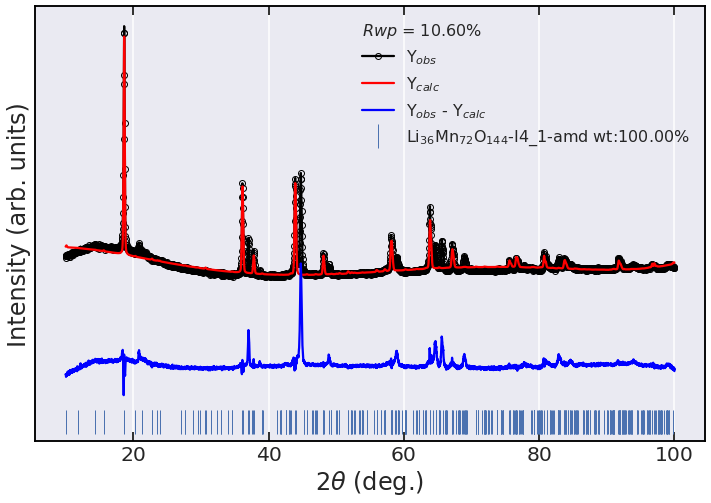

In [40]:
# First 0
missclass_2.plot_result(0, 'matplotlib', ?)

/home/nfm/_XerusRevision/Xerus/Examples/Li8-832Mn15-168O32-Fd-3m.csv
PWDR LiMn2O4+Li2MnO3_parsed_preprocessed.csv reflections written to file /home/nfm/_XerusRevision/Xerus/Examples/Li8-832Mn15-168O32-Fd-3m.csv
Li8.832Mn15.168O32-Fd-3m


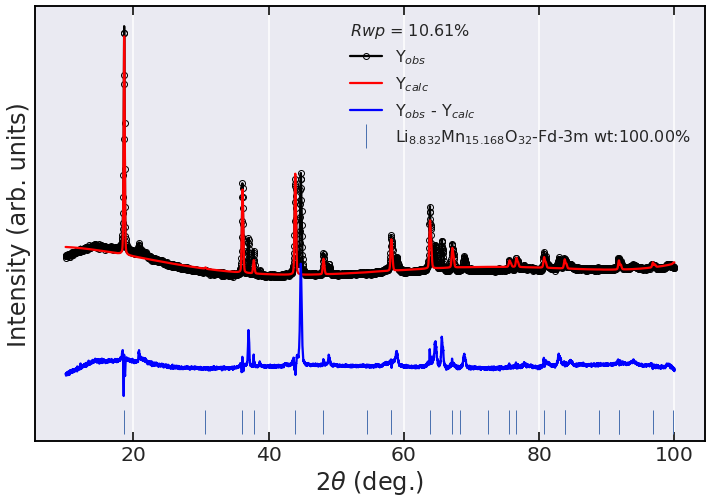

In [39]:
# Then 1
missclass_2.plot_result(1, 'matplotlib')

It is clear from the first result that due to the presence of all those extra bragg peaks, after the peak removal, almost all the pattern will be removed, and thus Xerus will stop after the first run. Also note that, since the first phase is the one being wrongly identified in this case, running with ```n_runs=2``` will not work. For these situations, XERUS allows us to ignore a specific CIF by providing its ID into the ignore_ids paramater:
```python
missclass_2.analyze(...,
                   ignore_ids = ['ID-to-ignore'])
```

In [42]:
# ID to ignore 4001894
id_to_ignore = [missclass_2.results.loc[0, 'id']]; 

In [43]:
missclass_2.analyze(n_runs = "auto", # No change here
                    ignore_ids = id_to_ignore)

Using preprocessed data benchmark/LiMn2O4_Li2MnO3/LiMn2O4+Li2MnO3_parsed_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:Mn
Checking the following combination:Li
Checking the following combination:Mn-O
Checking the following combination:Li-Mn
Checking the following combination:Li-O
Checking the following combination:Li-Mn-O
Mn
Li
Mn-O
Li-Mn
Li-O
Li-Mn-O
Modified Query for given 4 to : ['Mn', 'Li', 'Mn-O', 'Li-Mn', 'Li-O', 'Li-Mn-O']
Simulating 340 patterns
Done. Cleaning up GSASII files.
Highest Correlated pattern is Li8.832Mn15.168O32, with Cij: 0.8595520343525584
LiMn2O4+Li2MnO3_parsed.csv_Top30.html
Sucessfuly read datafile benchmark/LiMn2O4_Li2MnO3/LiMn2O4+Li2MnO3_parsed_preprocessed.csv
Refining 3 highest correlated patterns and determining main phase (n=0)...
Phase detected Li8.832Mn15.168O32_COD_1514031.cif with rwp 10.608112621848923
Removing 4 patterns that maximum intensity dropped below 10%.
Phase detected Li7.98M

,provider,id,name,filename,spacegroup,spacegroup_number,crystal_system,system_type,full_path,rwp,wt,nruns,pos,gpx_path
0,"[COD, COD]","[1514031, 1514065]","[Li8.832Mn15.168O32, Li2MnO3]","[Li8.832Mn15.168O32_COD_1514031.cif, Li2MnO3_C...","[Fd-3m, C2/c]","[227, 15]","[cubic, monoclinic]","[Li-Mn-O, Li-Mn-O]",[benchmark/LiMn2O4_Li2MnO3/cifs/Li8.832Mn15.16...,7.212964,"[0.50416, 0.49584]",2,"[1, 2]",benchmark/LiMn2O4_Li2MnO3/gsas2_files/Li8.832M...
1,"[COD, COD]","[1514031, 1544474]","[Li8.832Mn15.168O32, Li7.98Mn4.02O12]","[Li8.832Mn15.168O32_COD_1514031.cif, Li7.98Mn4...","[Fd-3m, C2/m]","[227, 12]","[cubic, monoclinic]","[Li-Mn-O, Li-Mn-O]",[benchmark/LiMn2O4_Li2MnO3/cifs/Li8.832Mn15.16...,7.403306,"[0.4916, 0.5084]",2,"[1, 2]",benchmark/LiMn2O4_Li2MnO3/gsas2_files/Li8.832M...
2,"[COD, MP]","[1514031, mp-35]","[Li8.832Mn15.168O32, Mn]","[Li8.832Mn15.168O32_COD_1514031.cif, Mn_MP_mp-...","[Fd-3m, I-43m]","[227, 217]","[cubic, cubic]","[Li-Mn-O, Mn]",[benchmark/LiMn2O4_Li2MnO3/cifs/Li8.832Mn15.16...,8.661515,"[0.78101, 0.21899]",2,"[1, 2]",benchmark/LiMn2O4_Li2MnO3/gsas2_files/Li8.832M...
3,"[COD, MP]","[1514031, mp-25275]","[Li8.832Mn15.168O32, MnO2]","[Li8.832Mn15.168O32_COD_1514031.cif, MnO2_MP_m...","[Fd-3m, Fd-3m]","[227, 227]","[cubic, cubic]","[Li-Mn-O, Mn-O]",[benchmark/LiMn2O4_Li2MnO3/cifs/Li8.832Mn15.16...,9.413326,"[0.76859, 0.23141]",2,"[1, 1]",benchmark/LiMn2O4_Li2MnO3/gsas2_files/Li8.832M...
4,"[COD, COD]","[1514031, 1514020]","[Li8.832Mn15.168O32, LiMn2O4]","[Li8.832Mn15.168O32_COD_1514031.cif, LiMn2O4_C...","[Fd-3m, Fddd]","[227, 70]","[cubic, orthorhombic]","[Li-Mn-O, Li-Mn-O]",[benchmark/LiMn2O4_Li2MnO3/cifs/Li8.832Mn15.16...,10.535905,"[0.89589, 0.10411]",2,"[1, 1]",benchmark/LiMn2O4_Li2MnO3/gsas2_files/Li8.832M...
5,COD,1514031,Li8.832Mn15.168O32,Li8.832Mn15.168O32_COD_1514031.cif,Fd-3m,227,cubic,Li-Mn-O,benchmark/LiMn2O4_Li2MnO3/cifs/Li8.832Mn15.168...,10.608113,100,1,1,benchmark/LiMn2O4_Li2MnO3/gsas2_files/Li8.832M...
6,COD,1514020,LiMn2O4,LiMn2O4_COD_1514020.cif,Fddd,70,orthorhombic,Li-Mn-O,benchmark/LiMn2O4_Li2MnO3/cifs/LiMn2O4_COD_151...,11.847408,100,1,1,benchmark/LiMn2O4_Li2MnO3/gsas2_files/LiMn2O4-...
7,MP,mp-25275,MnO2,MnO2_MP_mp-25275.cif,Fd-3m,227,cubic,Mn-O,benchmark/LiMn2O4_Li2MnO3/cifs/MnO2_MP_mp-2527...,12.364788,100,1,1,benchmark/LiMn2O4_Li2MnO3/gsas2_files/MnO2-Fd-...


Now notice that a second problem occurs. We correctly classify the first phase as cubic LiMn2O4. However Li2MnO3 shows two structures: C2/c and C2/m. As we noted in the paper, this is due diverging reports on the literature about the correct symmetry of the Li2MnO3 structure.